In [60]:
import pandas as pd
import numpy as np

In [61]:
df_train = pd.read_csv("/content/sample_data/mnist_train_small.csv")
df_test = pd.read_csv("/content/sample_data/mnist_test.csv")

In [62]:
print(df_train.shape)

(19999, 785)


In [63]:
df_train.head()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
df_test.tail()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
9994,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9995,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
data_train = df_train.values
data_test = df_test.values

In [66]:
img = data_train[702, 1:].reshape((28, 28))
label = data_train[702, 0]

0


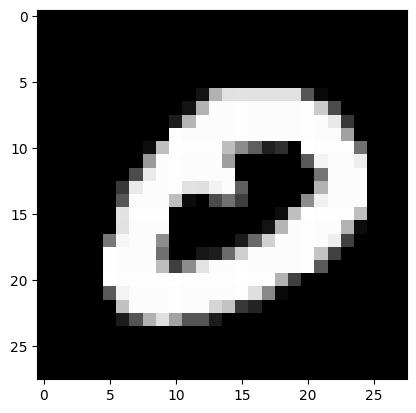

In [67]:
import matplotlib.pyplot as plt

print(label)
plt.imshow(img, cmap="gray")

In [68]:
x_train = data_train[:, 1:] / 255.
y_train = data_train[:, 0]
x_test = data_test[:, 1:] / 255.
y_test = data_test[:, 0]

In [69]:
from keras.utils import to_categorical

y_train_ctg = to_categorical(y_train)
y_test_ctg = to_categorical(y_test)

In [106]:
from keras.callbacks import EarlyStopping

callback = EarlyStopping(patience=5, restore_best_weights=True)

In [107]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(256, activation='relu', input_shape=x_train.shape[1:]))

model.add(Dense(128, activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(y_train_ctg.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy')

print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 256)               200960    
                                                                 
 dense_32 (Dense)            (None, 128)               32896     
                                                                 
 dense_33 (Dense)            (None, 32)                4128      
                                                                 
 dense_34 (Dense)            (None, 10)                330       
                                                                 
Total params: 238,314
Trainable params: 238,314
Non-trainable params: 0
_________________________________________________________________
None


In [108]:
results = model.fit(x_train, y_train_ctg, epochs=20, validation_data=(x_test, y_test_ctg), callbacks=callback)

Epoch 1/20
625/625 [==============================] - 5s 7ms/step - loss: 0.3594 - val_loss: 0.2034
Epoch 2/20
625/625 [==============================] - 5s 8ms/step - loss: 0.1495 - val_loss: 0.1526
Epoch 3/20
625/625 [==============================] - 5s 7ms/step - loss: 0.1003 - val_loss: 0.1442
Epoch 4/20
625/625 [==============================] - 5s 8ms/step - loss: 0.0732 - val_loss: 0.1158
Epoch 5/20
625/625 [==============================] - 6s 9ms/step - loss: 0.0532 - val_loss: 0.1358
Epoch 6/20
625/625 [==============================] - 4s 6ms/step - loss: 0.0405 - val_loss: 0.1318
Epoch 7/20
625/625 [==============================] - 5s 8ms/step - loss: 0.0320 - val_loss: 0.1498
Epoch 8/20
625/625 [==============================] - 5s 8ms/step - loss: 0.0245 - val_loss: 0.1749
Epoch 9/20
625/625 [==============================] - 4s 7ms/step - loss: 0.0189 - val_loss: 0.1561


In [109]:
yhat_train_ctg = model.predict(x_train).round()
yhat_test_ctg = model.predict(x_test).round()

313/313 [==============================] - 1s 2ms/step


In [110]:
yhat_train = yhat_train_ctg.argmax(axis=1)
yhat_test = yhat_test_ctg.argmax(axis=1)

In [111]:
from sklearn.metrics import classification_report as cr
from sklearn.metrics import confusion_matrix as cm

print(cr(y_train_ctg, yhat_train_ctg))
print(cr(y_test, yhat_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1962
           1       0.99      0.99      0.99      2243
           2       0.99      1.00      0.99      1989
           3       0.99      0.98      0.99      2021
           4       0.99      0.99      0.99      1924
           5       0.99      0.99      0.99      1761
           6       1.00      0.99      0.99      2038
           7       0.99      0.99      0.99      2126
           8       0.99      0.97      0.98      1912
           9       0.99      0.98      0.98      2023

   micro avg       0.99      0.99      0.99     19999
   macro avg       0.99      0.99      0.99     19999
weighted avg       0.99      0.99      0.99     19999
 samples avg       0.99      0.99      0.99     19999

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       980
           1       0.99      0.99      0.99      1135
           2       0.96 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [112]:
print(cm(y_train, yhat_train))
print(cm(y_test, yhat_test))

[[1957    0    0    1    0    0    1    0    2    1]
 [   4 2219   13    0    2    0    0    2    1    2]
 [   3    2 1980    2    0    0    0    1    0    1]
 [   8    3    5 1975    0    9    0    6    7    8]
 [   1    0    1    0 1910    0    4    1    0    7]
 [   3    0    1    2    0 1752    2    0    1    0]
 [   8    1    0    0    1    5 2023    0    0    0]
 [   5    4    6    0    0    1    0 2107    0    3]
 [  14   19    3    3    0    4    0    0 1864    5]
 [   6    0    0    2   18    2    0    6    1 1988]]
[[ 965    1    1    0    1    5    3    1    2    1]
 [   2 1124    6    0    0    0    1    1    1    0]
 [   2    0 1012    5    1    0    2    7    3    0]
 [  10    0   11  958    0   10    0   10    5    6]
 [   6    0    2    0  950    0    8    3    1   12]
 [  10    1    1    5    1  861    5    2    1    5]
 [   9    3    2    1    1    7  935    0    0    0]
 [   7    3   12    1    0    2    0  984    0   18]
 [  14    3    4    8    5   16    3    5  91

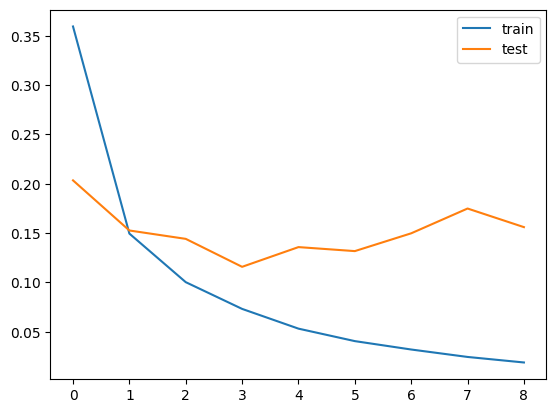

In [113]:
import matplotlib.pyplot as plt

plt.plot(results.history['loss'], label='train')
plt.plot(results.history['val_loss'], label='test')
plt.legend()

In [114]:
model.save('my_model.h5')

In [115]:
from keras.models import load_model

model1 = load_model('my_model.h5')

yhat_test_new = model1.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [116]:
model1.fit(x_train, y_train_ctg, epochs=20, validation_data=(x_test, y_test_ctg))

Epoch 1/20
625/625 [==============================] - 6s 9ms/step - loss: 0.0523 - val_loss: 0.1380
Epoch 2/20
625/625 [==============================] - 5s 7ms/step - loss: 0.0383 - val_loss: 0.1402
Epoch 3/20
625/625 [==============================] - 5s 8ms/step - loss: 0.0306 - val_loss: 0.1514
Epoch 4/20
625/625 [==============================] - 4s 7ms/step - loss: 0.0252 - val_loss: 0.1633
Epoch 5/20
625/625 [==============================] - 5s 8ms/step - loss: 0.0198 - val_loss: 0.2117
Epoch 6/20
625/625 [==============================] - 6s 10ms/step - loss: 0.0167 - val_loss: 0.1659
Epoch 7/20
625/625 [==============================] - 6s 10ms/step - loss: 0.0137 - val_loss: 0.1540
Epoch 8/20
625/625 [==============================] - 5s 8ms/step - loss: 0.0137 - val_loss: 0.2042
Epoch 9/20
625/625 [==============================] - 5s 7ms/step - loss: 0.0095 - val_loss: 0.2004
Epoch 10/20
625/625 [==============================] - 4s 6ms/step - loss: 0.0079 - val_loss: 0.19